In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import randn
from pandas import Series

In [2]:
df = pd.read_csv('https://bit.ly/HDSC-StageOneDataset')
df
df.describe()


,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [3]:
df


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [4]:
df_coal = df.set_index('fuel_type_code_pudl')
df_coal = df_coal.loc['waste']
df_coal.fuel_qty_burned.mean()
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

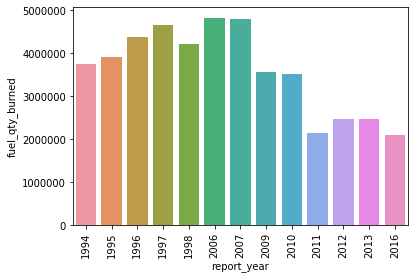

In [5]:
#from sklearn.impute import SimpleImputer
#imputer= SimpleImputer(missing_values = np.nan, strategy = 'most_frequent') 
#imputer = imputer.fit(df['fuel_unit'].reshape(-1,1)) 
#df['fuel_unit'].reshape(-1,1) = imputer.tranform(df['fuel_unit'].reshape(-1,1))
#df.isnull().sum()

df_ = df.groupby('plant_name_ferc1')
df_ = df_.get_group('barry')
df_
sns.barplot(df_.report_year, df_.fuel_qty_burned)
plt.xticks(rotation = 90)

In [6]:
df_ = df.set_index('plant_name_ferc1')
df_ = df_.loc['barry']
df_

,record_id,utility_id_ferc1,report_year,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
plant_name_ferc1,,,,,,,,,,
barry,f1_fuel_1994_12_2_0_7,2,1994,coal,ton,3739484.0,23.950,47.210,45.990,1.970
barry,f1_fuel_1995_12_2_0_7,2,1995,coal,ton,3902868.0,24.152,46.820,46.270,1.940
barry,f1_fuel_1996_12_2_0_7,2,1996,coal,ton,4374378.0,24.100,47.190,46.440,1.960
barry,f1_fuel_1997_12_2_0_7,2,1997,coal,ton,4653536.0,24.038,46.968,46.759,1.954
barry,f1_fuel_1998_12_2_0_9,2,1998,coal,ton,4211990.0,24.188,48.942,48.218,2.023
barry,f1_fuel_2006_12_2_0_7,2,2006,coal,ton,4825674.0,22.488,56.697,55.782,2.521
barry,f1_fuel_2007_12_2_0_7,2,2007,coal,ton,4803242.0,22.984,55.924,54.590,2.434
barry,f1_fuel_2009_12_2_0_7,2,2009,coal,ton,3568636.0,22.482,89.134,80.747,3.965
barry,f1_fuel_2010_12_2_0_7,2,2010,coal,ton,3510994.0,23.136,83.778,90.374,3.622


In [7]:

#df.fuel_type_code_pudl.value_counts()
#df.fuel_type_code_pudl.fillna(np.nan = 'coal')
df.info()
df.fuel_unit.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

# Data Preprocessing

x = df.iloc[:,:-1].values
y = df.iloc[:,-1:-2].values

# Replacing Missing Elements

from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values = np.nan, strategy = 'mean)
imputer = imputer.fit(x[:,**])
x[:,**] = imputer-tranform(x[:,**])


# Transition of string feature values to binary format

from sklearn.preprocessing import OneHotEncoder
from sklearn,compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('one_hot_encoder',OneHotEncoder(categories='auto'),[* ])].remainder='passthrough')
x = np.array(ct.fit_transfrom(x),dtype = np.float)

## Avoid the frist column:Dummy set

# Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder[]
Y = le.fit_transform(Y)

# Splitting Data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =  train_test_spli(x,y,test_size = 0.*,random_state = 0)

# FeatureScaling

from sklearn,preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transfrom(X_train)

# Simple Linear Regression

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)
Ypred = regr.predict(X)


# Visualize
plt.scatter(X,y)
plt.plot(x,regr.predict(x))
plt.title()
plt.xlabel()
plt.ylabel()



# Model Opt.
1. Significance level = (0.05)
2. fit model with all possible predict
3. consider the highest P value
remove P if P is > than SL
model is perfect when all Ps are less than SL

## add 1 as first column array

import statsmodels.fromula.api as sm
x = np.append(arr = np.ones((50,1)).astype(int), values = X,axis =1)
x_opt = x{:,[0,1,2,3,4...n]) % axis = 0 implies additional row
regr_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regr_OLS.summary()

# Polynomial Regr

from sklearning.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transfrom(x) # this transfroms the x feature to the number of degree inserted starting from x^0
Lin_regr2 = LinearRegression()
lin_regr2.fit(X_poly,y)
Y_pred = lin_regr2.predict(X_poy)

# SVM

### remember to normalize before initiating svm

from sklearn.svm import SVR
regr = SVR(kernel = 'rbf')
regr.fit(x,y) or ,y.ravel())

### Visualizing

plt.scatter(x,y)
plt.plot(x,regr.predict(x))

### predicting

y_pred = regr.predict(sc_x.transfrom([[55.6]])
y_pred = sc_y.inverse_transform(y_pred)

C:\Users\Oguntoye Kunle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.
C:\Users\Oguntoye Kunle\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


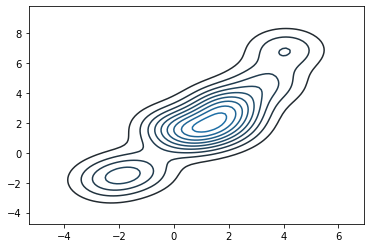

In [8]:
a = np.random.multivariate_normal([2,3],[[3,4],[5,6]],10)
sns.kdeplot(a)

(array([1., 1., 0., 1., 1., 1., 3., 0., 1., 1.]),
 array([-2.44080185, -1.78805095, -1.13530004, -0.48254914,  0.17020176,
         0.82295267,  1.47570357,  2.12845448,  2.78120538,  3.43395629,
         4.08670719]),
 <a list of 10 Patch objects>)

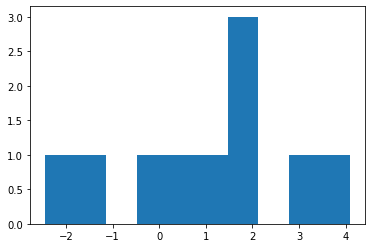

In [9]:
plt.hist(a[:,0])

In [10]:
df= df.fillna(method = 'bfill')
df.fuel_unit.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29523 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB
